# Clustering de documents de la décénie 1960–1969

In [41]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [42]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\louel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
data_path = "../data/txt/"

## Décénie 1960–1969

In [44]:
DECADE = '1960'

In [45]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [46]:
# Exemple de fichiers
files[:5]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt']

In [47]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [48]:
# Exemple de textes
texts[0][:400]

"ia« le som ÏJsIne MéuhMrïiqii S.AT'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 029"

In [49]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [33]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [50]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [51]:
# Détail de la matrice
tfidf_vectors

<1000x2998 sparse matrix of type '<class 'numpy.float64'>'
	with 591558 stored elements in Compressed Sparse Row format>

In [52]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429849
ecrire        0.290763
agence        0.287302
bilingue      0.195620
importante    0.172368
                ...   
envoyé        0.000000
er            0.000000
erreurs       0.000000
esp           0.000000
♦             0.000000
Length: 2998, dtype: float64

In [ ]:
tfidf_array = tfidf_vectors.toarray()

## Nombre de clusters définis  

In [70]:
N_CLUSTERS = 3

In [71]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [72]:
clusters = km_model.fit_predict(tfidf_vectors)

c:\Users\louel\Desktop\MA2 stic\Traitement automatique de corpus\TP\tac\tac_venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [74]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-10_01-00018.txt',
     'KB_JB838_1960-02-03_01-00019.txt',
     'KB_JB838_1960-02-13_01-00020.txt',
     'KB_JB838_1960-03-11_01-00020.txt',
     'KB_JB838_1960-03-25_01-00020.txt',
     'KB_JB838_1960-03-29_01-00018.txt',
     'KB_JB838_1960-04-01_01-00020.txt',
     'KB_JB838_1960-04-02_01-00017.txt',
     'KB_JB838_1960-04-30_01-00016.txt',
     'KB_JB838_1960-07-06_01-00020.txt',
     'KB_JB838_1960-08-04_01-00018.txt',
     'KB_JB838_1960-08-13_01-00016.txt',
     'KB_JB838_1960-08-28_01-00019.txt',
     'KB_JB838_1960-09-18_01-00020.txt',
     'KB_JB838_1960-10-28_01-00020.txt',
     'KB_JB838_1960-11-04_01-00019.txt',
     'KB_JB838_1960-11-12_01-00017.txt',
     'KB_JB838_1960-11-13_01-00019.txt',
     'KB_JB838_1960-11-25_01-00020.txt',
     'KB_JB838_1960-12-10_01-00019.txt',
     'KB_JB838_1960-12-21_01-00017.txt',
     'KB_JB838_1960-12-23_01-00019.txt',
     'KB_JB838_1961-02-02_01-00019.txt',
     'KB_JB838_1961-02-11_01-00017.txt',
     'KB_JB838_1

In [75]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [76]:
reduced_vectors[:10]

array([[ 0.4992516 , -0.43941756],
       [-0.22887338,  0.0013748 ],
       [-0.27929013, -0.01571144],
       [ 0.28623276,  0.51679187],
       [ 0.3069986 ,  0.51868353],
       [-0.28969465, -0.09047495],
       [-0.04744472,  0.04053161],
       [-0.06063925,  0.11980055],
       [-0.22347725, -0.05224721],
       [-0.12166066,  0.07459231]])

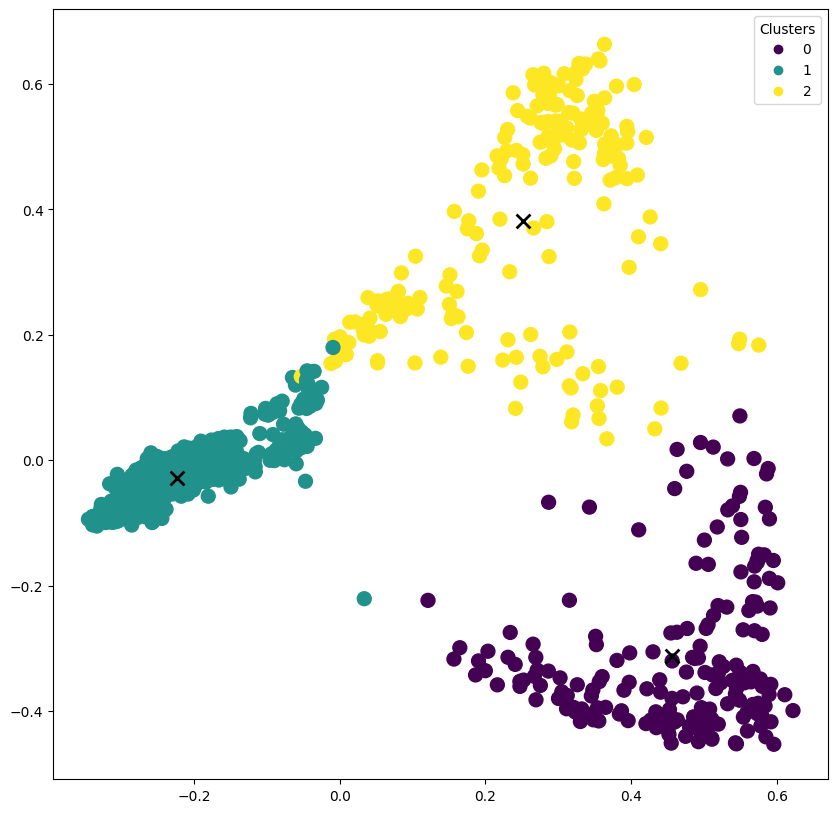

In [77]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

## Analyse : mots clés des clusters